In [1]:
import Bio
from Bio import SeqIO
from Bio.Seq import Seq
import numpy as np
import pandas as pd
from pandas import DataFrame as df
import seaborn as sns
import matplotlib.pyplot as plt
import subprocess
import os
from mothur_py import Mothur
from shutil import copy
import warnings
from Bio import pairwise2
from Bio.pairwise2 import format_alignment
from ipysankeywidget import SankeyWidget
warnings.filterwarnings("ignore")

In [2]:
SeqIO.convert("../../raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq", "../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02.fasta", "fasta")

279742

In [3]:
fastq_dict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/raw_data/Hu_FAH15473_albacore202/workspace/pass/barcode02/barcode02.fastq", "fastq"))

279742


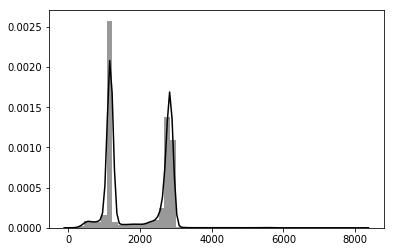

In [4]:
lengths = []
for key in fastq_dict:
    lengths.append(len(fastq_dict[key].seq))
print(len(fastq_dict))
sns.distplot(lengths, color="k")

In [5]:
long_ITS = fastq_dict.copy()
for key in fastq_dict:
    if len(fastq_dict[key].seq) not in range(2000, 4001):
        del long_ITS[key]

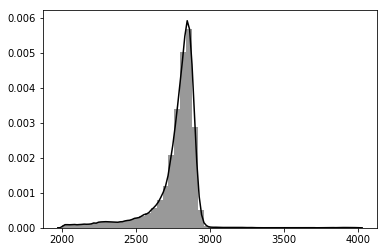

In [6]:
lengths_ITS = []
for key in long_ITS:
    lengths_ITS.append(len(long_ITS[key].seq))
sns.distplot(lengths_ITS, color='k')

In [7]:
# SeqIO.write(long_ITS.values(), "/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta")

In [8]:
fastq_ITS = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta", "fasta"))

133755
133755


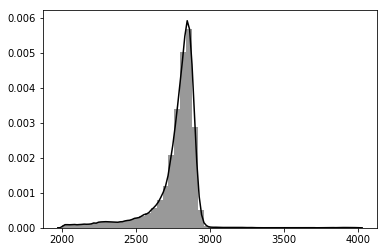

In [9]:
lengths = []
for key in fastq_ITS:
    lengths.append(len(fastq_ITS[key].seq))
print(len(fastq_ITS))
sns.distplot(lengths, color="k")
print(len(lengths))

In [10]:
m = Mothur()

In [11]:
m.help()

In [12]:
m.pcr.seqs(fasta='../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.fasta', oligos='/media/MassStorage/tmp/TE/summer_project/analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=0, rdiffs=0)

In [13]:
pcr_dict = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/barcode02_clipped.pcr.fasta", "fasta"))

1827


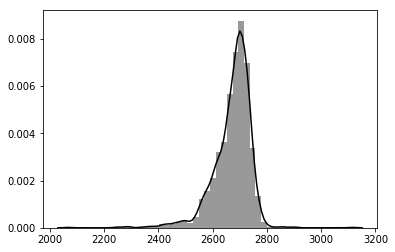

In [14]:
lengths_pcr = []
ids = []
for key in pcr_dict:
    lengths_pcr.append(len(pcr_dict[key].seq))
    ids.append(key)
sns.distplot(lengths_pcr, color='k')
print(len(lengths_pcr))

In [15]:
with open("../../analysis/descriptors/1827_ids.txt", "w") as f:
    for key in pcr_dict:
        f.write("%s\n" % pcr_dict[key].id)

1000


1000

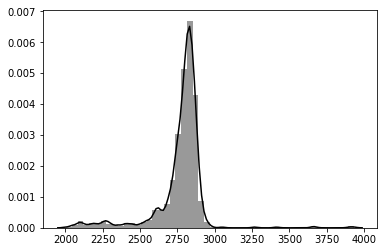

In [16]:
small_dict = {k: fastq_ITS[k] for k in list(fastq_ITS.keys())[:1000]}
lengths_small = []
for key in small_dict:
    lengths_small.append(len(small_dict[key].seq))
sns.distplot(lengths_small, color='k')
print(len(lengths_small))
SeqIO.write(small_dict.values(), "../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta", "fasta")

In [17]:
initial_file = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small.fasta'
base_name = '../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small%i.fasta'
for x in range(0, 10):
    infile=base_name %x
    copy(initial_file, infile)
    m.pcr.seqs(fasta=infile, oligos='../../analysis/mothur_fasta/FAH15473/pass/barcode02/primer_test.oligos', pdiffs=x, rdiffs=x)

Pdiffs value is 9
The number of values available is 319
Pdiffs value is 2
The number of values available is 125
Pdiffs value is 7
The number of values available is 315
Pdiffs value is 1
The number of values available is 74
Pdiffs value is 3
The number of values available is 175
Pdiffs value is 8
The number of values available is 317
Pdiffs value is 0
The number of values available is 29
Pdiffs value is 6
The number of values available is 312
Pdiffs value is 4
The number of values available is 228
Pdiffs value is 5
The number of values available is 268


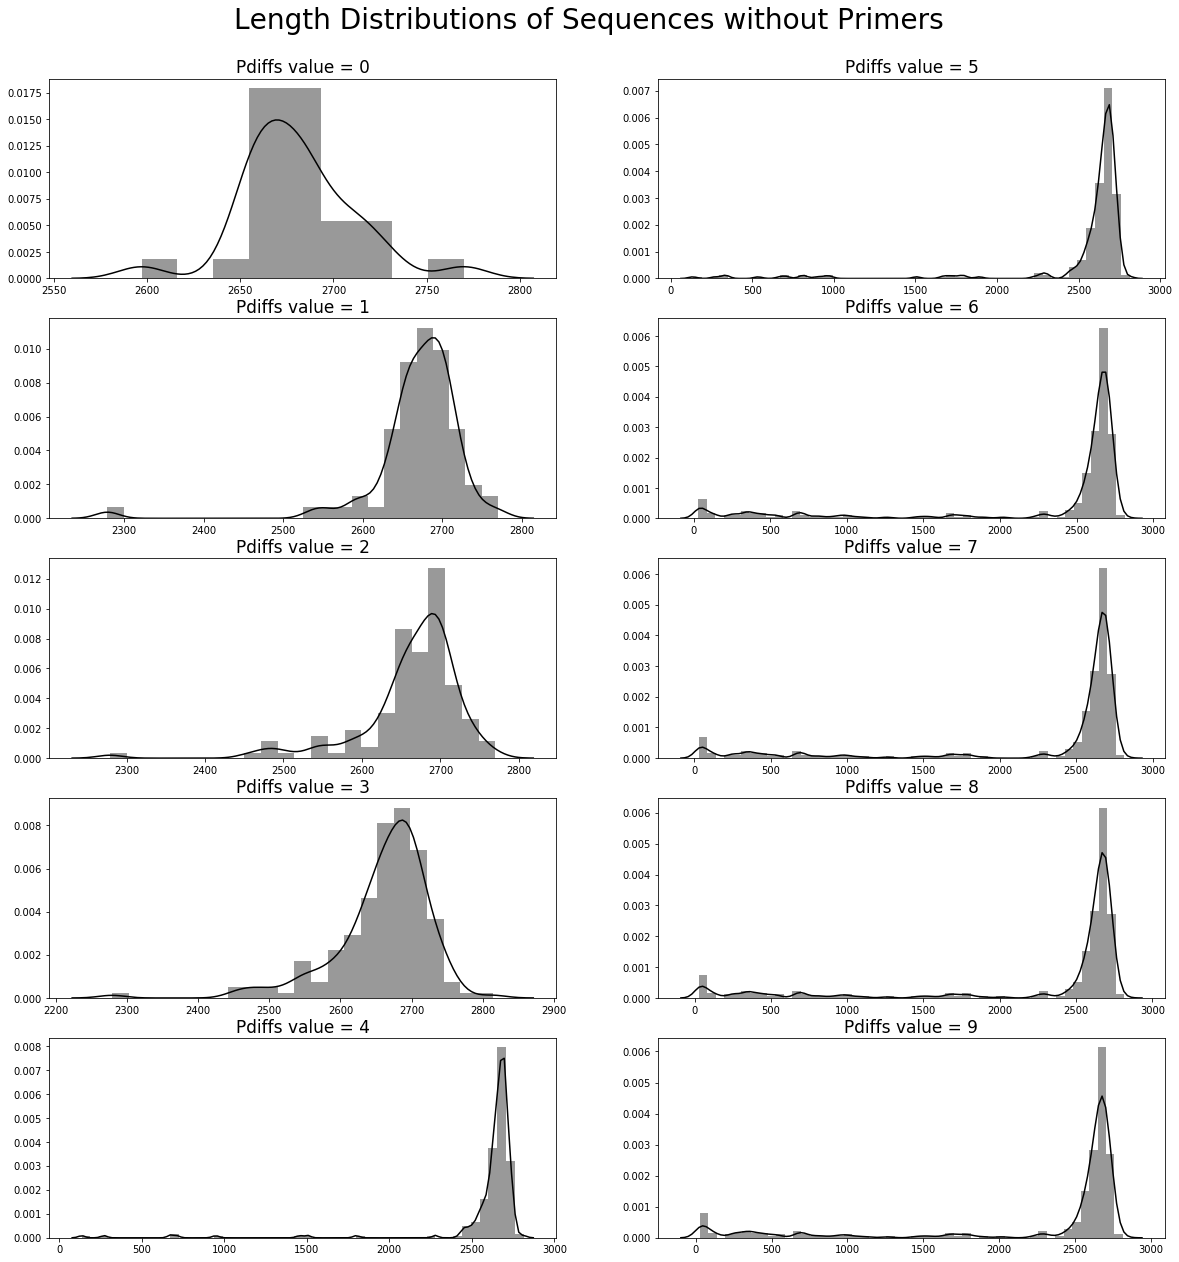

In [18]:
fg, ax = plt.subplots(5,2, figsize=(20,20))
fg.suptitle("Length Distributions of Sequences without Primers", fontsize=28)
fg.subplots_adjust(top=0.93)
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        print("Pdiffs value is", os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        print("The number of values available is", len(lengths_tmp))
        if pdiffs < 5:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs][0])
            ax[pdiffs][0].set_title(pdiffs_str, fontsize=17)
        else:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs - 5][1])
            ax[pdiffs - 5][1].set_title(pdiffs_str, fontsize=17)

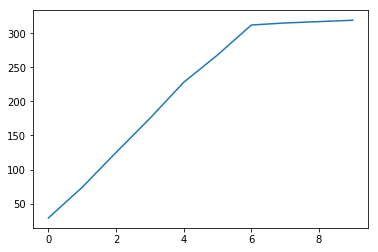

In [19]:
x = []
y = []
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        x.append(pdiffs)
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            lengths_tmp.append(len(tmp_dict[key].seq))
        y.append(len(lengths_tmp))
sns.lineplot(x, y)

Pdiffs value is 9
The number of values available is 257
Pdiffs value is 2
The number of values available is 125
Pdiffs value is 7
The number of values available is 256
Pdiffs value is 1
The number of values available is 74
Pdiffs value is 3
The number of values available is 175
Pdiffs value is 8
The number of values available is 257
Pdiffs value is 0
The number of values available is 29
Pdiffs value is 6
The number of values available is 256
Pdiffs value is 4
The number of values available is 220
Pdiffs value is 5
The number of values available is 249


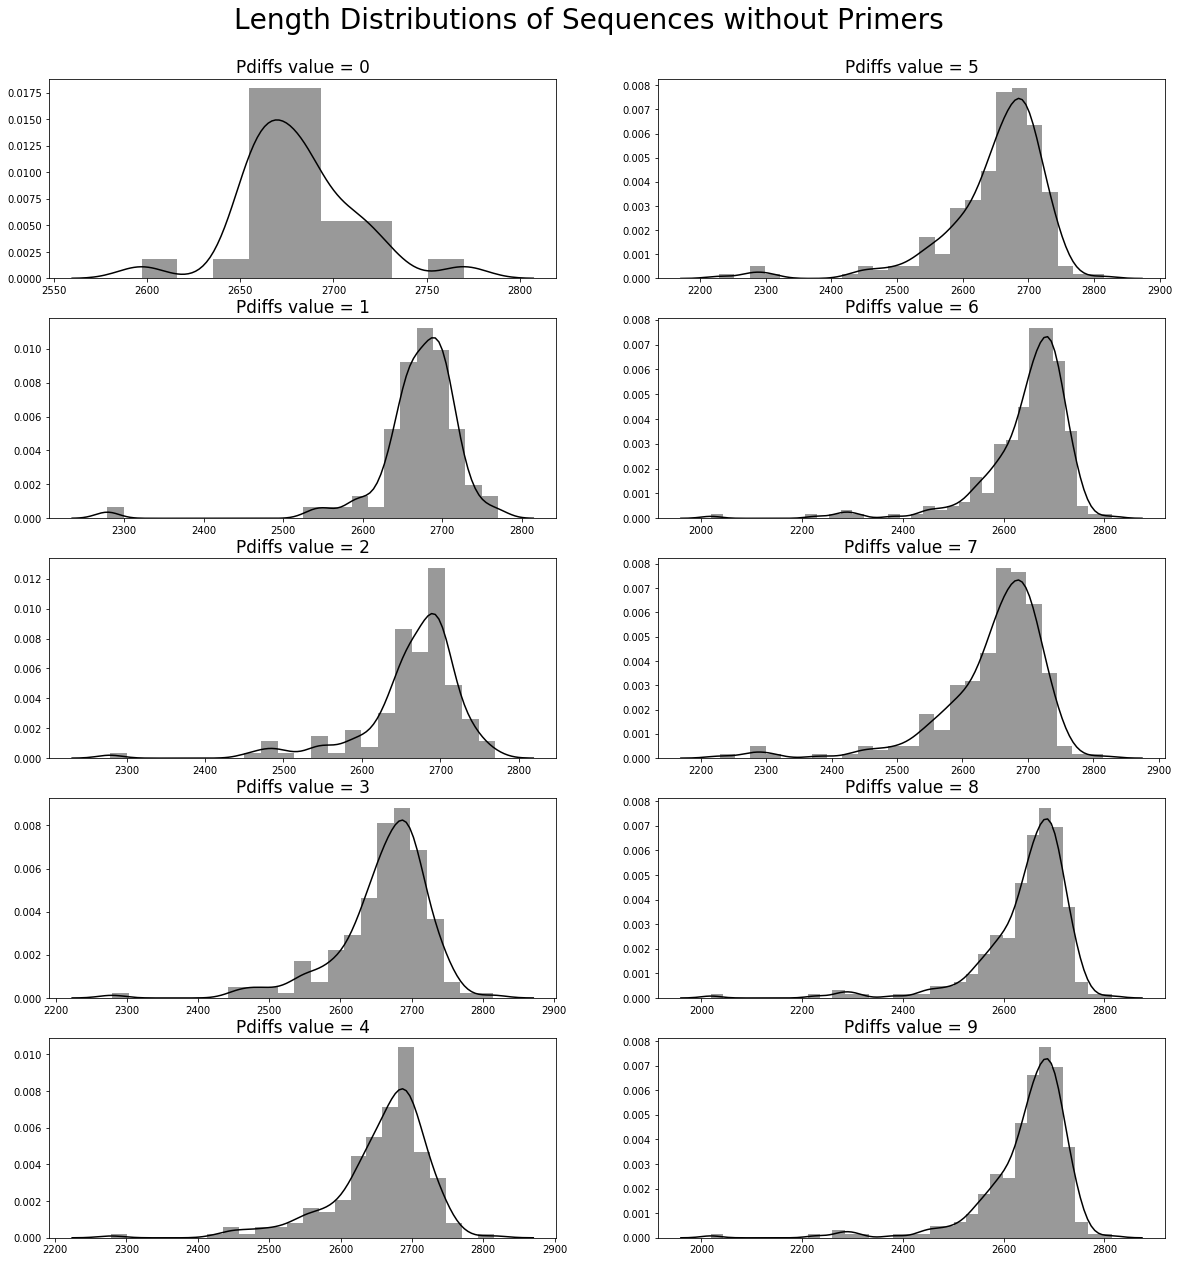

In [20]:
fg, ax = plt.subplots(5,2, figsize=(20,20))
fg.suptitle("Length Distributions of Sequences without Primers", fontsize=28)
fg.subplots_adjust(top=0.93)
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        print("Pdiffs value is", os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            if len(tmp_dict[key].seq) > 2000:
                lengths_tmp.append(len(tmp_dict[key].seq))
        print("The number of values available is", len(lengths_tmp))
        if pdiffs < 5:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs][0])
            ax[pdiffs][0].set_title(pdiffs_str, fontsize=17)
        else:
            sns.distplot(lengths_tmp, color='k', ax=ax[pdiffs - 5][1])
            ax[pdiffs - 5][1].set_title(pdiffs_str, fontsize=17)

### Filter again on length? Focus on range with expected values to see whether the plateau changes?

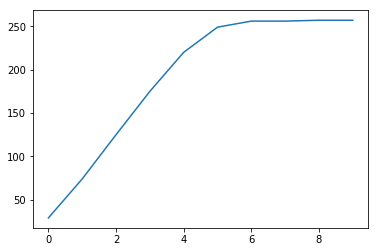

In [21]:
x = []
y = []
for file in os.listdir('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/'):
    if file.endswith('.pcr.fasta') and not file.endswith('.scrap.pcr.fasta'):
        pdiffs = int(os.path.splitext(os.path.splitext(file)[0])[0][-1])
        x.append(pdiffs)
        pdiffs_str = "Pdiffs value = %i" %pdiffs
        tmp_dict = SeqIO.to_dict(SeqIO.parse(os.path.join('../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/', file), "fasta"))
        lengths_tmp = []
        for key in tmp_dict:
            if len(tmp_dict[key].seq) > 2000:
                lengths_tmp.append(len(tmp_dict[key].seq))
        y.append(len(lengths_tmp))
sns.lineplot(x, y)

In [22]:
qscores = []
ids = []
smallq_dict = {k: long_ITS[k] for k in list(long_ITS.keys())[:1000]}
for record in smallq_dict:
    ids.append(smallq_dict[record].id)
for key in smallq_dict:
    qscores.append((-10*np.log10(np.mean(10**(-1*np.array((smallq_dict[key].letter_annotations["phred_quality"]))/10)))))
smallq_qscores_dataframe = df(qscores, columns=["Mean"], index=ids)
lengths_smallq = []
for key in smallq_dict:
    lengths_smallq.append(len(smallq_dict[key].seq))

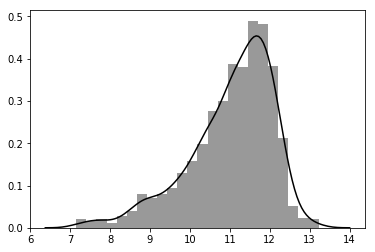

In [23]:
sns.distplot((qscores), color="k")

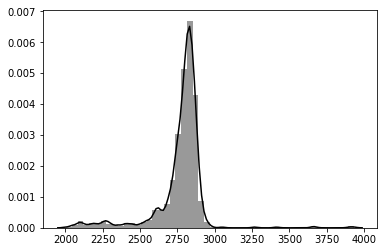

In [24]:
sns.distplot(lengths_smallq, color="k")

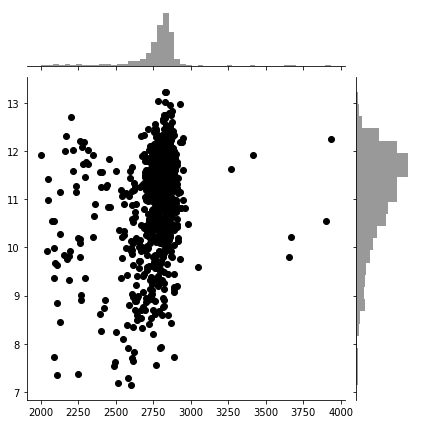

In [25]:
sns.jointplot(x=lengths_smallq, y=qscores, color="k")

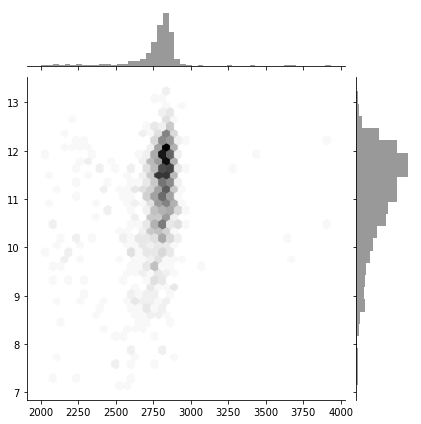

In [26]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

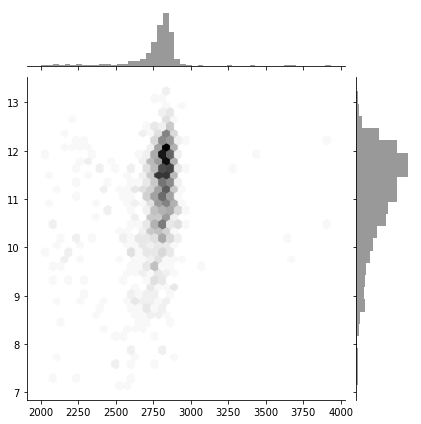

In [27]:
sns.jointplot(x=lengths_smallq, y=qscores, kind="hex", color="k")

### Choosing pdiffs and rdiffs of 6 as the maximised values

In [28]:
dict6 = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small6.pcr.fasta", "fasta"))
print(len(dict6))
gdict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/analysis/blast_results/zymo/BED/bed_output.fasta", "fasta"))

312


In [29]:
dict6_seqs = []
framework = []
for key in dict6:
    dict6_seqs.append(dict6[key].seq)
    framework.append(key)
    framework.append(dict6[key].seq)
    framework.append(len(dict6[key].seq))
gdict_seqs = []
for key in gdict:
    gdict_seqs.append(gdict[key].seq)

In [30]:
alignments = pairwise2.align.globalms(gdict_seqs[0], dict6_seqs[0], 1, -1, -1, 0)

In [31]:
# print(format_alignment(*alignments[0]))

In [32]:
aap = []
acp = []
agp = []
atp = []
agapp = []
cap =[]
ccp=[]
cgp=[]
ctp=[]
cgapp=[]
gap=[]
gcp=[]
ggp=[]
gtp=[]
ggapp=[]
tap=[]
tcp=[]
tgp=[]
ttp=[]
tgapp=[]
gapap=[]
gapcp=[]
gapgp=[]
gaptp=[]
omatches=[]
alnlengths=[]
for j in dict6_seqs:
    alignments = pairwise2.align.globalms(gdict_seqs[0], j, 1, -1, -1, 0)
    total = 0
    aa = 0
    ac = 0
    ag = 0
    at = 0
    agap = 0
    ca =0
    cc=0
    cg=0
    ct=0
    cgap=0
    ga=0
    gc=0
    gg=0
    gt=0
    ggap=0
    ta=0
    tc=0
    tg=0
    tt=0
    tgap=0
    gapa=0
    gapc=0
    gapg=0
    gapt=0
    comparison = alignments[0][0:2]
    for i in range(0, len(comparison[0])):
        if comparison[0][i] == "A":
            if comparison[1][i] == "C":
                ac+=1
                total += 1
            elif comparison[1][i] == "G":
                ag+=1
                total += 1
            elif comparison[1][i] == "T":
                at+=1
                total += 1
            elif comparison[1][i] == "A":
                aa+=1
                total += 1
            else:
                agap+=1
                total += 1
        if comparison[0][i] == "C":
            if comparison[1][i] == "A":
                ca+=1
                total += 1
            elif comparison[1][i] == "G":
                cg+=1
                total += 1
            elif comparison[1][i] == "T":
                ct+=1
                total += 1
            elif comparison[1][i] == "C":
                cc+=1
                total += 1
            else:
                cgap+=1
                total += 1
        if comparison[0][i] == "G":
            if comparison[1][i] == "A":
                ga+=1
                total += 1
            elif comparison[1][i] == "C":
                gc+=1
                total += 1
            elif comparison[1][i] == "T":
                gt+=1
                total += 1
            elif comparison[1][i] == "G":
                gg+=1
                total += 1
            else:
                ggap+=1
                total += 1
        if comparison[0][i] == "T":
            if comparison[1][i] == "A":
                ta+=1
                total += 1
            elif comparison[1][i] == "C":
                tc+=1
                total += 1
            elif comparison[1][i] == "G":
                tg+=1
                total += 1
            elif comparison[1][i] == "T":
                tt+=1
                total += 1
            else:
                tgap+=1
                total += 1
        if comparison[0][i] == "-":
            if comparison[1][i] == "A":
                gapa+=1
                total += 1
            elif comparison[1][i] == "C":
                gapc+=1
                total += 1
            elif comparison[1][i] == "G":
                gapg+=1
                total += 1
            elif comparison[1][i] == "T":
                gapt+=1
                total += 1
    acp.append(100*ac/total)
    agp.append(100*ag/total)
    atp.append(100*at/total)
    agapp.append(100*agap/total)
    aap.append(100*aa/total)
    cap.append(100*ca/total)
    cgp.append(100*cg/total)
    ctp.append(100*ct/total)
    cgapp.append(100*cgap/total)
    ccp.append(100*cc/total)
    gap.append(100*ga/total)
    gcp.append(100*gc/total)
    gtp.append(100*gt/total)
    ggapp.append(100*ggap/total)
    ggp.append(100*gg/total)
    tap.append(100*ta/total)
    tcp.append(100*tc/total)
    tgp.append(100*tg/total)
    tgapp.append(100*tgap/total)
    ttp.append(100*tt/total)
    gapap.append(100*gapa/total)
    gapcp.append(100*gapc/total)
    gapgp.append(100*gapg/total)
    gaptp.append(100*gapt/total)
    alnlengths.append(total)
expeca=len(acp)+len(agp)+len(atp)+len(aap)+len(agapp)
expeca=len(ccp)+len(cgp)+len(ctp)+len(cap)+len(cgapp)
expeca=len(gcp)+len(ggp)+len(gtp)+len(gap)+len(ggapp)
expeca=len(tcp)+len(tgp)+len(ttp)+len(tap)+len(tgapp)
astats = [aap, acp, agp, atp, agapp]
cstats = [cap, ccp, cgp, ctp, cgapp]
gstats = [gap, gcp, ggp, gtp, ggapp]
tstats = [tap, tcp, tgp, ttp, tgapp]
gapstats = [gapap, gapcp, gapgp, gaptp]
for i in range(0, len(aap)):
    omatches.append(aap[i]+ccp[i]+ggp[i]+ttp[i])
ostats = [omatches, aap, ccp, ggp, ttp]

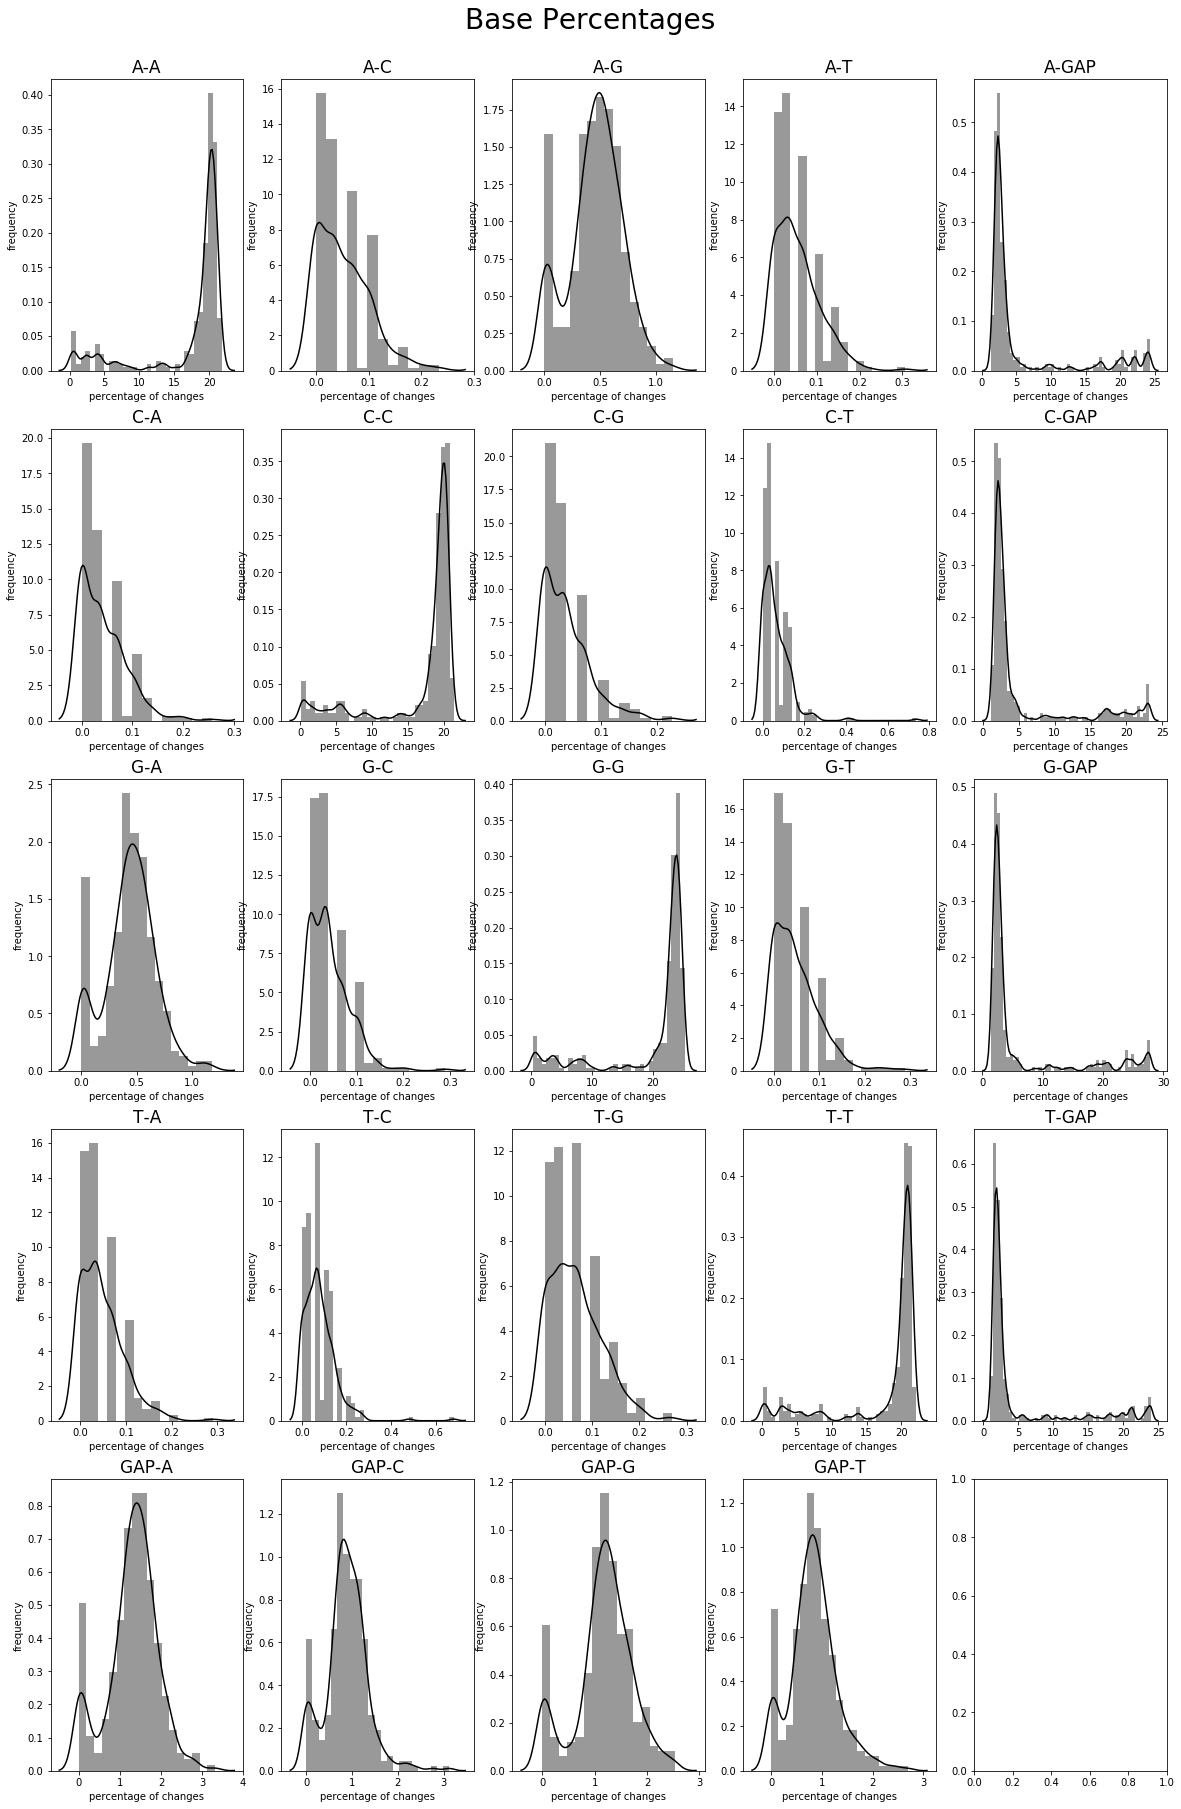

In [33]:
fg, ax = plt.subplots(5, 5, figsize=(20,20))
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
titles = ['A-A', 'A-C', 'A-G', 'A-T', 'A-GAP', 'C-A', 'C-C', 'C-G', 'C-T', 'C-GAP', 'G-A', 'G-C', 'G-G', 'G-T', 'G-GAP', 'T-A', 'T-C', 'T-G', 'T-T', 'T-GAP', 'GAP-A', 'GAP-C', 'GAP-G', 'GAP-T']

for i in range(0, 24):
    if i < 5:
        sns.distplot(astats[i], color='k', ax=ax[0][i])
        ax[0][i].set_title(titles[i], fontsize=17)
        ax[0][i].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 4 and i < 10:
        sns.distplot(cstats[i-5], color='k', ax=ax[1][i-5])
        ax[1][i-5].set_title(titles[i], fontsize=17)
        ax[1][i-5].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 9 and i < 15:
        sns.distplot(gstats[i-10], color='k', ax=ax[2][i-10])
        ax[2][i-10].set_title(titles[i], fontsize=17)
        ax[2][i-10].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 14 and i < 20:
        sns.distplot(tstats[i-15], color='k', ax=ax[3][i-15])
        ax[3][i-15].set_title(titles[i], fontsize=17)
        ax[3][i-15].set(xlabel='percentage of changes', ylabel='frequency')
    else:
        sns.distplot(gapstats[i-20], color='k', ax=ax[4][i-20])
        ax[4][i-20].set_title(titles[i], fontsize=17)
        ax[4][i-20].set(xlabel='percentage of changes', ylabel='frequency')


In [34]:
ostatstats = [[np.mean(ostats[0]),np.mean(ostats[1]),np.mean(ostats[2]),np.mean(ostats[3]),np.mean(ostats[4])],[np.median(ostats[0]),np.median(ostats[1]),np.median(ostats[2]),np.median(ostats[3]),np.median(ostats[4])]]
ostatsframe = pd.DataFrame(data=ostatstats, columns=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches'], index=['Mean', 'Median'])
ostatsframe

,Overall Matches,A Matches,C Matches,G Matches,T Matches
Mean,72.233225,17.246764,16.980132,20.232775,17.773554
Median,83.478530,19.959093,19.529618,23.387469,20.515065


### First make dataframe and can filter the dataframe
#### Normalise for alignment length? - 

In [35]:
frameworked = pd.DataFrame(columns=['Key', 'Sequence', 'Sequence Length', 'Alignment Length'], index=framework[0::3])
frameworked['Sequence'] = framework[1::3]
frameworked['Key'] = framework[0::3]
frameworked['Sequence Length'] = framework[2::3]
frameworked['Alignment Length'] = alnlengths

In [36]:
aap = []
acp = []
agp = []
atp = []
agapp = []
cap =[]
ccp=[]
cgp=[]
ctp=[]
cgapp=[]
gap=[]
gcp=[]
ggp=[]
gtp=[]
ggapp=[]
tap=[]
tcp=[]
tgp=[]
ttp=[]
tgapp=[]
gapap=[]
gapcp=[]
gapgp=[]
gaptp=[]
omatches=[]
alnslengths=[]
expeca = []
expecc = []
expecg = []
expect = []
for key in frameworked['Key']:
    if frameworked.loc[key, 'Sequence Length'] > 2000:
        alignments = pairwise2.align.globalms(gdict_seqs[0], dict6[key].seq, 1, -1, -1, 0)
        total = 0
        aa = 0
        ac = 0
        ag = 0
        at = 0
        agap = 0
        ca =0
        cc=0
        cg=0
        ct=0
        cgap=0
        ga=0
        gc=0
        gg=0
        gt=0
        ggap=0
        ta=0
        tc=0
        tg=0
        tt=0
        tgap=0
        gapa=0
        gapc=0
        gapg=0
        gapt=0
        tmpa=0
        tmpc=0
        tmpg=0
        tmpt=0
        comparison = alignments[0][0:2]
        for i in range(0, len(comparison[0])):
            if comparison[0][i] == "A":
                tmpa += 1
                if comparison[1][i] == "C":
                    ac+=1
                    total += 1
                elif comparison[1][i] == "G":
                    ag+=1
                    total += 1
                elif comparison[1][i] == "T":
                    at+=1
                    total += 1
                elif comparison[1][i] == "A":
                    aa+=1
                    total += 1
                else:
                    agap+=1
                    total += 1
            if comparison[0][i] == "C":
                tmpc+=1
                if comparison[1][i] == "A":
                    ca+=1
                    total += 1
                elif comparison[1][i] == "G":
                    cg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    ct+=1
                    total += 1
                elif comparison[1][i] == "C":
                    cc+=1
                    total += 1
                else:
                    cgap+=1
                    total += 1
            if comparison[0][i] == "G":
                tmpg+=1
                if comparison[1][i] == "A":
                    ga+=1
                    total += 1
                elif comparison[1][i] == "C":
                    gc+=1
                    total += 1
                elif comparison[1][i] == "T":
                    gt+=1
                    total += 1
                elif comparison[1][i] == "G":
                    gg+=1
                    total += 1
                else:
                    ggap+=1
                    total += 1
            if comparison[0][i] == "T":
                tmpt+=1
                if comparison[1][i] == "A":
                    ta+=1
                    total += 1
                elif comparison[1][i] == "C":
                    tc+=1
                    total += 1
                elif comparison[1][i] == "G":
                    tg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    tt+=1
                    total += 1
                else:
                    tgap+=1
                    total += 1
            if comparison[0][i] == "-":
                if comparison[1][i] == "A":
                    gapa+=1
                    total += 1
                elif comparison[1][i] == "C":
                    gapc+=1
                    total += 1
                elif comparison[1][i] == "G":
                    gapg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    gapt+=1
                    total += 1
        acp.append(100*ac/total)
        agp.append(100*ag/total)
        atp.append(100*at/total)
        agapp.append(100*agap/total)
        aap.append(100*aa/total)
        cap.append(100*ca/total)
        cgp.append(100*cg/total)
        ctp.append(100*ct/total)
        cgapp.append(100*cgap/total)
        ccp.append(100*cc/total)
        gap.append(100*ga/total)
        gcp.append(100*gc/total)
        gtp.append(100*gt/total)
        ggapp.append(100*ggap/total)
        ggp.append(100*gg/total)
        tap.append(100*ta/total)
        tcp.append(100*tc/total)
        tgp.append(100*tg/total)
        tgapp.append(100*tgap/total)
        ttp.append(100*tt/total)
        gapap.append(100*gapa/total)
        gapcp.append(100*gapc/total)
        gapgp.append(100*gapg/total)
        gaptp.append(100*gapt/total)
        alnslengths.append(total)
        expeca.append(100*tmpa/total)
        expecc.append(100*tmpc/total)
        expecg.append(100*tmpg/total)
        expect.append(100*tmpt/total)
astats = [aap, acp, agp, atp, agapp]
cstats = [cap, ccp, cgp, ctp, cgapp]
gstats = [gap, gcp, ggp, gtp, ggapp]
tstats = [tap, tcp, tgp, ttp, tgapp]
gapstats = [gapap, gapcp, gapgp, gaptp]
expec = [expeca, expecc, expecg, expect]
for i in range(0, len(aap)):
    omatches.append(aap[i]+ccp[i]+ggp[i]+ttp[i])
ostats = [omatches, aap, ccp, ggp, ttp]

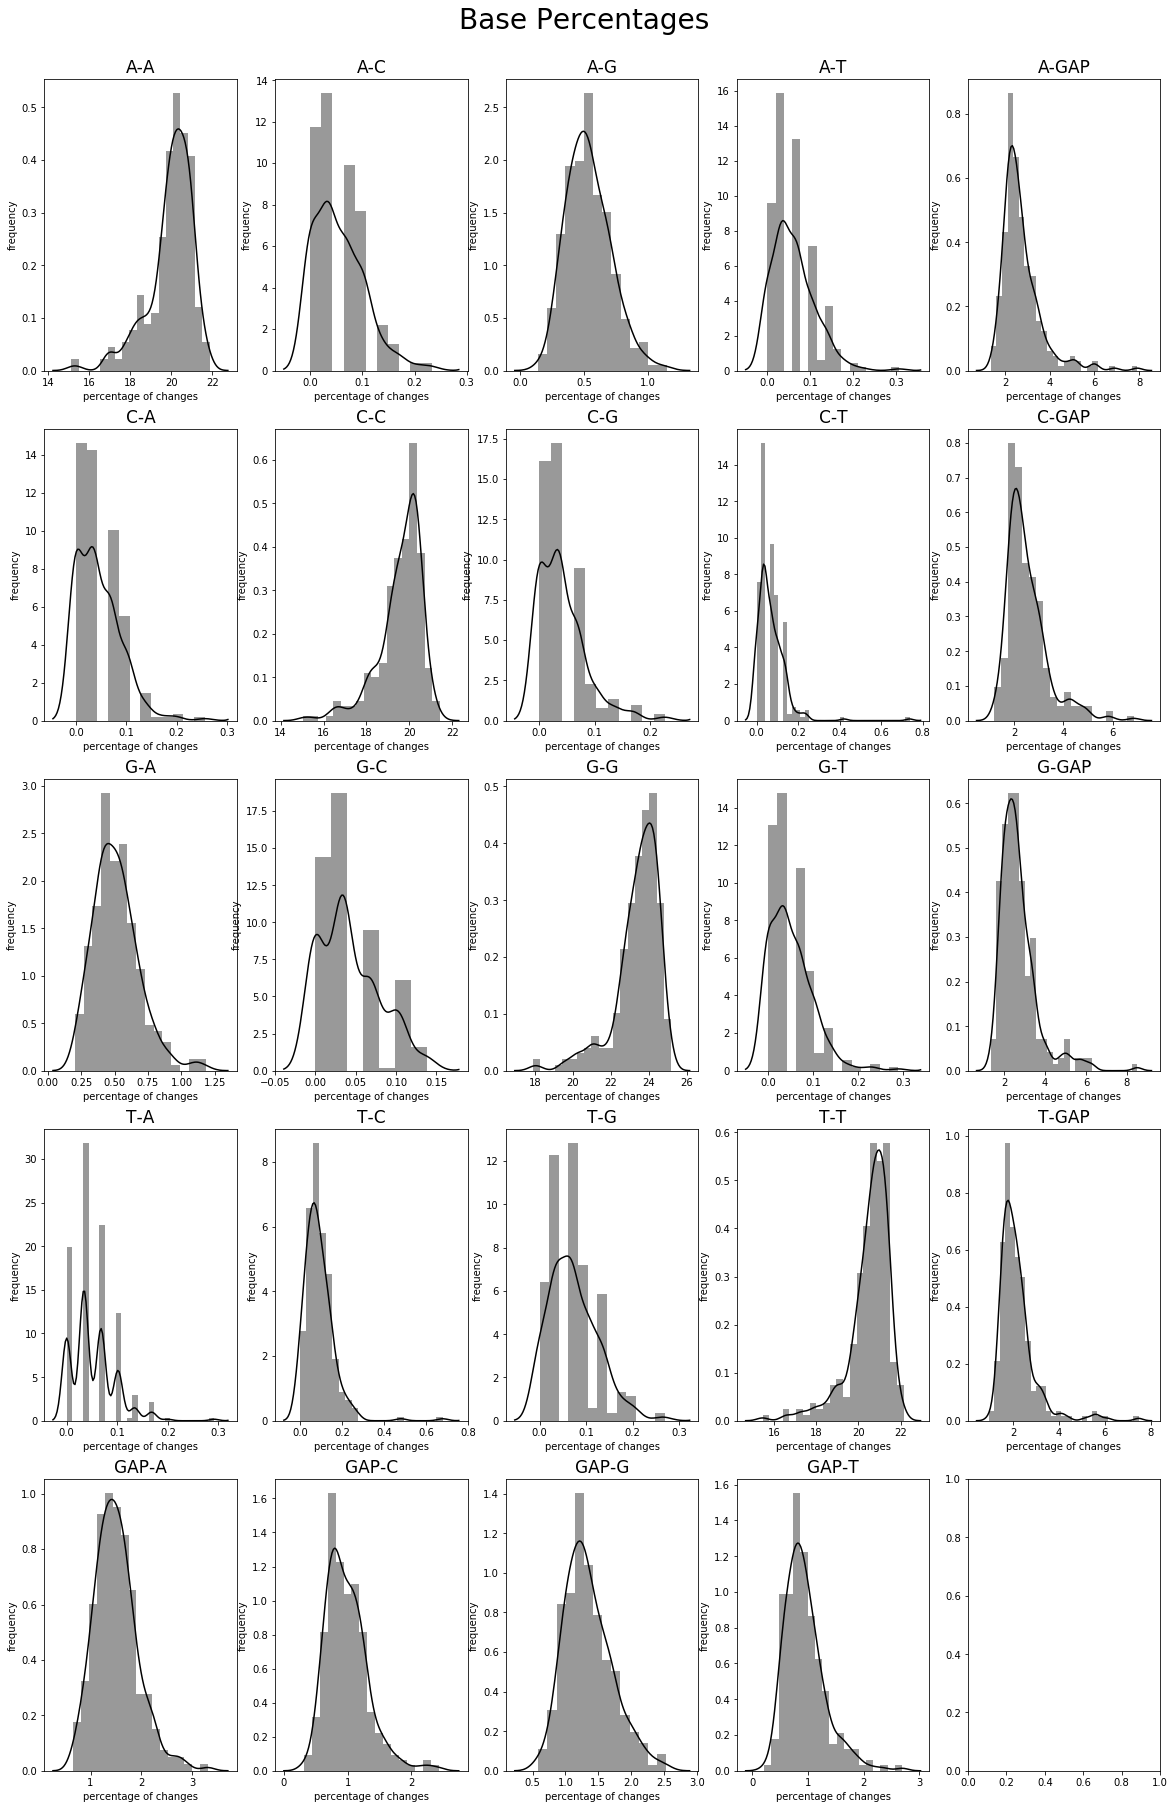

In [37]:
fg, ax = plt.subplots(5, 5, figsize=(20,20))
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
titles = ['A-A', 'A-C', 'A-G', 'A-T', 'A-GAP', 'C-A', 'C-C', 'C-G', 'C-T', 'C-GAP', 'G-A', 'G-C', 'G-G', 'G-T', 'G-GAP', 'T-A', 'T-C', 'T-G', 'T-T', 'T-GAP', 'GAP-A', 'GAP-C', 'GAP-G', 'GAP-T']

for i in range(0, 24):
        if i < 5:
            sns.distplot(astats[i], color='k', ax=ax[0][i])
            ax[0][i].set_title(titles[i], fontsize=17)
            ax[0][i].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 4 and i < 10:
            sns.distplot(cstats[i-5], color='k', ax=ax[1][i-5])
            ax[1][i-5].set_title(titles[i], fontsize=17)
            ax[1][i-5].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 9 and i < 15:
            sns.distplot(gstats[i-10], color='k', ax=ax[2][i-10])
            ax[2][i-10].set_title(titles[i], fontsize=17)
            ax[2][i-10].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 14 and i < 20:
            sns.distplot(tstats[i-15], color='k', ax=ax[3][i-15])
            ax[3][i-15].set_title(titles[i], fontsize=17)
            ax[3][i-15].set(xlabel='percentage of changes', ylabel='frequency')
        else:
            sns.distplot(gapstats[i-20], color='k', ax=ax[4][i-20])
            ax[4][i-20].set_title(titles[i], fontsize=17)
            ax[4][i-20].set(xlabel='percentage of changes', ylabel='frequency')


### Draw expected values - #A/total
### Plot above and below 2000 to show why you filter?

#### Mutations from X to purines appear to be the most common type of mutation

In [38]:
ostatstats = [[np.mean(ostats[0]),np.mean(ostats[1]),np.mean(ostats[2]),np.mean(ostats[3]),np.mean(ostats[4])],[np.median(ostats[0]),np.median(ostats[1]),np.median(ostats[2]),np.median(ostats[3]),np.median(ostats[4])]]
ostatsframe = pd.DataFrame(data=ostatstats, columns=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches'], index=['Mean', 'Median'])
ostatsframe

,Overall Matches,A Matches,C Matches,G Matches,T Matches
Mean,83.471007,19.975633,19.582785,23.402408,20.510180
Median,84.595881,20.219141,19.838811,23.674789,20.739842


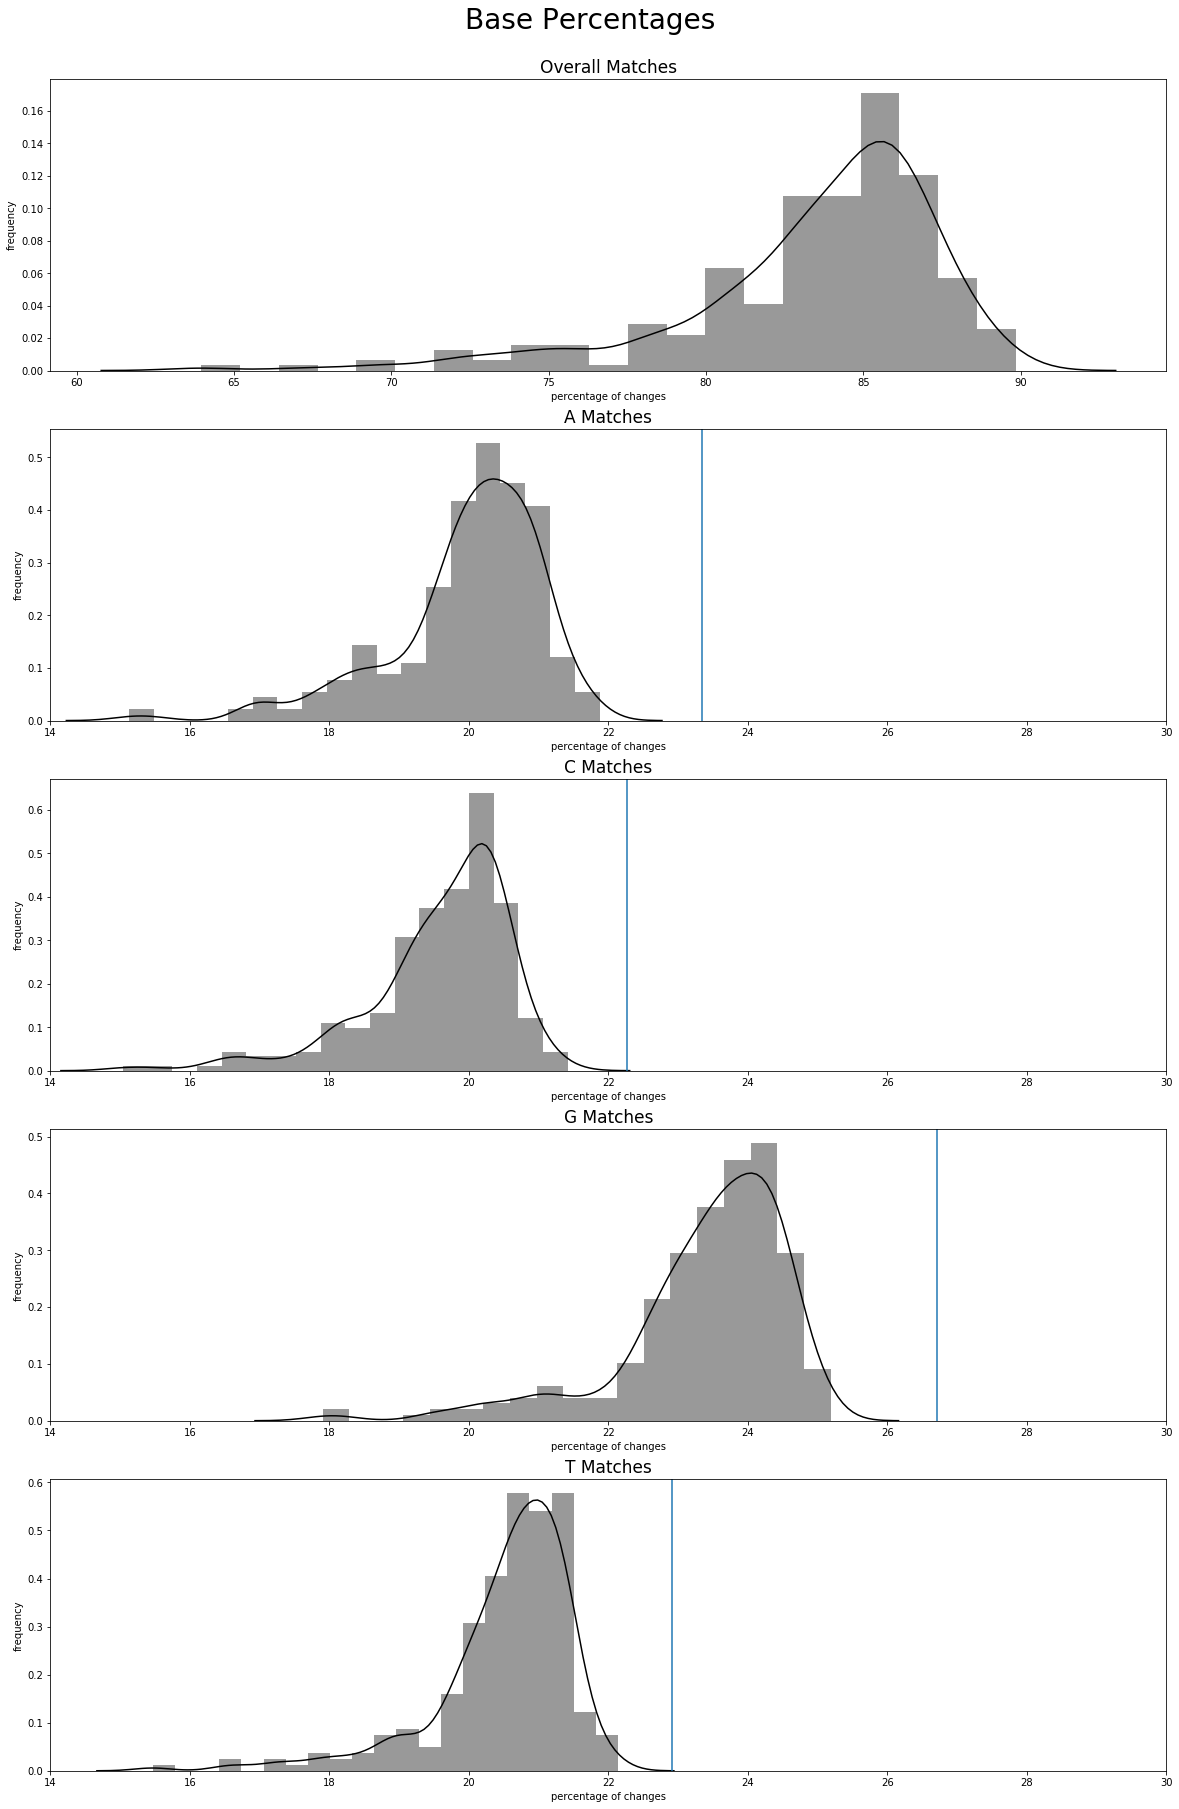

In [39]:
fg, ax = plt.subplots(5, 1, figsize=(20,20), squeeze=False)
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
otitles=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches']

for i in range(0, len(ostats)):
    sns.distplot(ostats[i], color='k', ax=ax[i][0])
    ax[i][0].set_title(otitles[i], fontsize=17)
    ax[i][0].set(xlabel='percentage of changes', ylabel='frequency')
    if i > 0:
        ax[i][0].set(xlim=(14, 30))
        ax[i][0].axvline(np.mean(expec[i-1]))

Make dataframe to save lengths tied to their corresponding key and sequence
       - Dataframe that contains variables otherwise contained in lists (concat or generate)
           - Index as read id
               - Sequence length, alignment length, qscore

### Choosing pdiffs and rdiffs of 5 as the maximised values

In [40]:
dict5 = SeqIO.to_dict(SeqIO.parse("../../analysis/mothur_fasta/FAH15473/pass/barcode02/diffs/small5.pcr.fasta", "fasta"))
gdict = SeqIO.to_dict(SeqIO.parse("/media/MassStorage/tmp/TE/summer_project/analysis/blast_results/zymo/BED/bed_output.fasta", "fasta"))

In [41]:
dict5_seqs = []
framework = []
for key in dict5:
    if len(dict5[key].seq) > 2000:
        dict5_seqs.append(dict5[key].seq)
        framework.append(key)
        framework.append(dict5[key].seq)
        framework.append(len(dict5[key].seq))
gdict_seqs = []
for key in gdict:
    gdict_seqs.append(gdict[key].seq)

In [42]:
alignments = pairwise2.align.globalms(gdict_seqs[0], dict5_seqs[0], 1, -1, -1, 0)

In [43]:
# print(format_alignment(*alignments[0]))

In [44]:
aap = []
acp = []
agp = []
atp = []
agapp = []
cap =[]
ccp=[]
cgp=[]
ctp=[]
cgapp=[]
gap=[]
gcp=[]
ggp=[]
gtp=[]
ggapp=[]
tap=[]
tcp=[]
tgp=[]
ttp=[]
tgapp=[]
gapap=[]
gapcp=[]
gapgp=[]
gaptp=[]
omatches=[]
alnlengths=[]
for j in dict5_seqs:
    alignments = pairwise2.align.globalms(gdict_seqs[0], j, 1, -1, -1, 0)
    total = 0
    aa = 0
    ac = 0
    ag = 0
    at = 0
    agap = 0
    ca =0
    cc=0
    cg=0
    ct=0
    cgap=0
    ga=0
    gc=0
    gg=0
    gt=0
    ggap=0
    ta=0
    tc=0
    tg=0
    tt=0
    tgap=0
    gapa=0
    gapc=0
    gapg=0
    gapt=0
    comparison = alignments[0][0:2]
    for i in range(0, len(comparison[0])):
        if comparison[0][i] == "A":
            if comparison[1][i] == "C":
                ac+=1
                total += 1
            elif comparison[1][i] == "G":
                ag+=1
                total += 1
            elif comparison[1][i] == "T":
                at+=1
                total += 1
            elif comparison[1][i] == "A":
                aa+=1
                total += 1
            else:
                agap+=1
                total += 1
        if comparison[0][i] == "C":
            if comparison[1][i] == "A":
                ca+=1
                total += 1
            elif comparison[1][i] == "G":
                cg+=1
                total += 1
            elif comparison[1][i] == "T":
                ct+=1
                total += 1
            elif comparison[1][i] == "C":
                cc+=1
                total += 1
            else:
                cgap+=1
                total += 1
        if comparison[0][i] == "G":
            if comparison[1][i] == "A":
                ga+=1
                total += 1
            elif comparison[1][i] == "C":
                gc+=1
                total += 1
            elif comparison[1][i] == "T":
                gt+=1
                total += 1
            elif comparison[1][i] == "G":
                gg+=1
                total += 1
            else:
                ggap+=1
                total += 1
        if comparison[0][i] == "T":
            if comparison[1][i] == "A":
                ta+=1
                total += 1
            elif comparison[1][i] == "C":
                tc+=1
                total += 1
            elif comparison[1][i] == "G":
                tg+=1
                total += 1
            elif comparison[1][i] == "T":
                tt+=1
                total += 1
            else:
                tgap+=1
                total += 1
        if comparison[0][i] == "-":
            if comparison[1][i] == "A":
                gapa+=1
                total += 1
            elif comparison[1][i] == "C":
                gapc+=1
                total += 1
            elif comparison[1][i] == "G":
                gapg+=1
                total += 1
            elif comparison[1][i] == "T":
                gapt+=1
                total += 1
    acp.append(100*ac/total)
    agp.append(100*ag/total)
    atp.append(100*at/total)
    agapp.append(100*agap/total)
    aap.append(100*aa/total)
    cap.append(100*ca/total)
    cgp.append(100*cg/total)
    ctp.append(100*ct/total)
    cgapp.append(100*cgap/total)
    ccp.append(100*cc/total)
    gap.append(100*ga/total)
    gcp.append(100*gc/total)
    gtp.append(100*gt/total)
    ggapp.append(100*ggap/total)
    ggp.append(100*gg/total)
    tap.append(100*ta/total)
    tcp.append(100*tc/total)
    tgp.append(100*tg/total)
    tgapp.append(100*tgap/total)
    ttp.append(100*tt/total)
    gapap.append(100*gapa/total)
    gapcp.append(100*gapc/total)
    gapgp.append(100*gapg/total)
    gaptp.append(100*gapt/total)
    alnlengths.append(total)
expeca=len(acp)+len(agp)+len(atp)+len(aap)+len(agapp)
expeca=len(ccp)+len(cgp)+len(ctp)+len(cap)+len(cgapp)
expeca=len(gcp)+len(ggp)+len(gtp)+len(gap)+len(ggapp)
expeca=len(tcp)+len(tgp)+len(ttp)+len(tap)+len(tgapp)
astats = [aap, acp, agp, atp, agapp]
cstats = [cap, ccp, cgp, ctp, cgapp]
gstats = [gap, gcp, ggp, gtp, ggapp]
tstats = [tap, tcp, tgp, ttp, tgapp]
gapstats = [gapap, gapcp, gapgp, gaptp]
for i in range(0, len(aap)):
    omatches.append(aap[i]+ccp[i]+ggp[i]+ttp[i])
ostats = [omatches, aap, ccp, ggp, ttp]

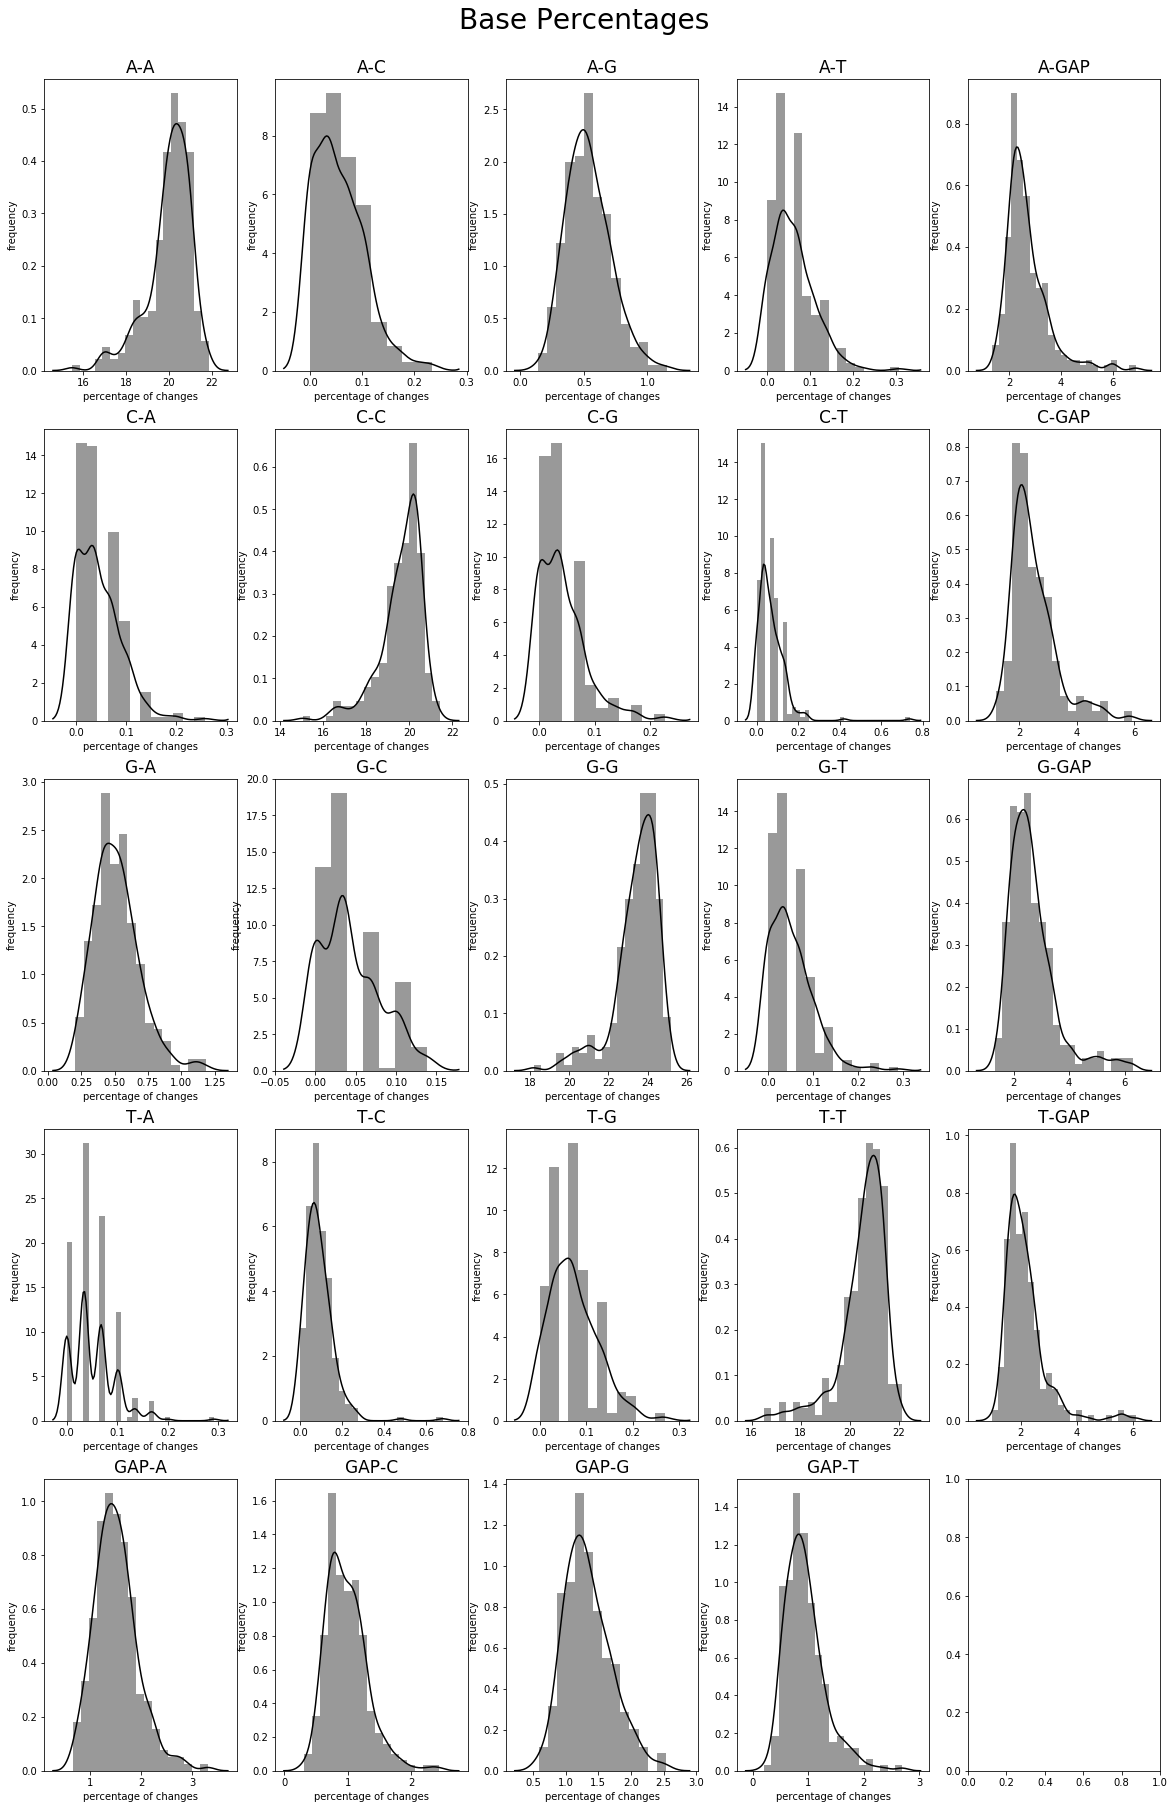

In [45]:
fg, ax = plt.subplots(5, 5, figsize=(20,20))
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
titles = ['A-A', 'A-C', 'A-G', 'A-T', 'A-GAP', 'C-A', 'C-C', 'C-G', 'C-T', 'C-GAP', 'G-A', 'G-C', 'G-G', 'G-T', 'G-GAP', 'T-A', 'T-C', 'T-G', 'T-T', 'T-GAP', 'GAP-A', 'GAP-C', 'GAP-G', 'GAP-T']

for i in range(0, 24):
    if i < 5:
        sns.distplot(astats[i], color='k', ax=ax[0][i])
        ax[0][i].set_title(titles[i], fontsize=17)
        ax[0][i].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 4 and i < 10:
        sns.distplot(cstats[i-5], color='k', ax=ax[1][i-5])
        ax[1][i-5].set_title(titles[i], fontsize=17)
        ax[1][i-5].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 9 and i < 15:
        sns.distplot(gstats[i-10], color='k', ax=ax[2][i-10])
        ax[2][i-10].set_title(titles[i], fontsize=17)
        ax[2][i-10].set(xlabel='percentage of changes', ylabel='frequency')
    elif i > 14 and i < 20:
        sns.distplot(tstats[i-15], color='k', ax=ax[3][i-15])
        ax[3][i-15].set_title(titles[i], fontsize=17)
        ax[3][i-15].set(xlabel='percentage of changes', ylabel='frequency')
    else:
        sns.distplot(gapstats[i-20], color='k', ax=ax[4][i-20])
        ax[4][i-20].set_title(titles[i], fontsize=17)
        ax[4][i-20].set(xlabel='percentage of changes', ylabel='frequency')


In [46]:
ostatstats = [[np.mean(ostats[0]),np.mean(ostats[1]),np.mean(ostats[2]),np.mean(ostats[3]),np.mean(ostats[4])],[np.median(ostats[0]),np.median(ostats[1]),np.median(ostats[2]),np.median(ostats[3]),np.median(ostats[4])]]
ostatsframe = pd.DataFrame(data=ostatstats, columns=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches'], index=['Mean', 'Median'])
ostatsframe

,Overall Matches,A Matches,C Matches,G Matches,T Matches
Mean,83.617828,20.017442,19.611139,23.442637,20.546609
Median,84.682861,20.232797,19.850949,23.697479,20.761128


### First make dataframe and can filter the dataframe
Normalise for alignment length?

In [47]:
frameworked = pd.DataFrame(columns=['Key', 'Sequence', 'Sequence Length', 'Alignment Length'], index=framework[0::3])
frameworked['Sequence'] = framework[1::3]
frameworked['Key'] = framework[0::3]
frameworked['Sequence Length'] = framework[2::3]
frameworked['Alignment Length'] = alnlengths

### Package lists into dictionary, then make dataframe out of it using pd.DataFrame.from_dict(dict_name)

In [224]:
error_dict = {}
error_dict['aap'] = []
error_dict['aap'].append(3)
error_dict['aap'].append(1700)
error_dict
pd.DataFrame.from_dict(error_dict)

,aap
0,3
1,1700


In [48]:
aap = []
acp = []
agp = []
atp = []
agapp = []
cap =[]
ccp=[]
cgp=[]
ctp=[]
cgapp=[]
gap=[]
gcp=[]
ggp=[]
gtp=[]
ggapp=[]
tap=[]
tcp=[]
tgp=[]
ttp=[]
tgapp=[]
gapap=[]
gapcp=[]
gapgp=[]
gaptp=[]
omatches=[]
alnslengths=[]
expeca = []
expecc = []
expecg = []
expect = []
for key in frameworked['Key']:
    if frameworked.loc[key, 'Sequence Length'] > 2000:
        alignments = pairwise2.align.globalms(gdict_seqs[0], dict5[key].seq, 1, -1, -1, 0)
        total = 0
        aa = 0
        ac = 0
        ag = 0
        at = 0
        agap = 0
        ca =0
        cc=0
        cg=0
        ct=0
        cgap=0
        ga=0
        gc=0
        gg=0
        gt=0
        ggap=0
        ta=0
        tc=0
        tg=0
        tt=0
        tgap=0
        gapa=0
        gapc=0
        gapg=0
        gapt=0
        tmpa=0
        tmpc=0
        tmpg=0
        tmpt=0
        comparison = alignments[0][0:2]
        for i in range(0, len(comparison[0])):
            if comparison[0][i] == "A":
                tmpa += 1
                if comparison[1][i] == "C":
                    ac+=1
                    total += 1
                elif comparison[1][i] == "G":
                    ag+=1
                    total += 1
                elif comparison[1][i] == "T":
                    at+=1
                    total += 1
                elif comparison[1][i] == "A":
                    aa+=1
                    total += 1
                else:
                    agap+=1
                    total += 1
            if comparison[0][i] == "C":
                tmpc+=1
                if comparison[1][i] == "A":
                    ca+=1
                    total += 1
                elif comparison[1][i] == "G":
                    cg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    ct+=1
                    total += 1
                elif comparison[1][i] == "C":
                    cc+=1
                    total += 1
                else:
                    cgap+=1
                    total += 1
            if comparison[0][i] == "G":
                tmpg+=1
                if comparison[1][i] == "A":
                    ga+=1
                    total += 1
                elif comparison[1][i] == "C":
                    gc+=1
                    total += 1
                elif comparison[1][i] == "T":
                    gt+=1
                    total += 1
                elif comparison[1][i] == "G":
                    gg+=1
                    total += 1
                else:
                    ggap+=1
                    total += 1
            if comparison[0][i] == "T":
                tmpt+=1
                if comparison[1][i] == "A":
                    ta+=1
                    total += 1
                elif comparison[1][i] == "C":
                    tc+=1
                    total += 1
                elif comparison[1][i] == "G":
                    tg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    tt+=1
                    total += 1
                else:
                    tgap+=1
                    total += 1
            if comparison[0][i] == "-":
                if comparison[1][i] == "A":
                    gapa+=1
                    total += 1
                elif comparison[1][i] == "C":
                    gapc+=1
                    total += 1
                elif comparison[1][i] == "G":
                    gapg+=1
                    total += 1
                elif comparison[1][i] == "T":
                    gapt+=1
                    total += 1
        acp.append(100*ac/total)
        agp.append(100*ag/total)
        atp.append(100*at/total)
        agapp.append(100*agap/total)
        aap.append(100*aa/total)
        cap.append(100*ca/total)
        cgp.append(100*cg/total)
        ctp.append(100*ct/total)
        cgapp.append(100*cgap/total)
        ccp.append(100*cc/total)
        gap.append(100*ga/total)
        gcp.append(100*gc/total)
        gtp.append(100*gt/total)
        ggapp.append(100*ggap/total)
        ggp.append(100*gg/total)
        tap.append(100*ta/total)
        tcp.append(100*tc/total)
        tgp.append(100*tg/total)
        tgapp.append(100*tgap/total)
        ttp.append(100*tt/total)
        gapap.append(100*gapa/total)
        gapcp.append(100*gapc/total)
        gapgp.append(100*gapg/total)
        gaptp.append(100*gapt/total)
        alnslengths.append(total)
        expeca.append(100*tmpa/total)
        expecc.append(100*tmpc/total)
        expecg.append(100*tmpg/total)
        expect.append(100*tmpt/total)
astats = [aap, acp, agp, atp, agapp]
# List comprehension for doing this via a dict
cstats = [cap, ccp, cgp, ctp, cgapp]
gstats = [gap, gcp, ggp, gtp, ggapp]
tstats = [tap, tcp, tgp, ttp, tgapp]
gapstats = [gapap, gapcp, gapgp, gaptp]
expec = [expeca, expecc, expecg, expect]
for i in range(0, len(aap)):
    omatches.append(aap[i]+ccp[i]+ggp[i]+ttp[i])
ostats = [omatches, aap, ccp, ggp, ttp]

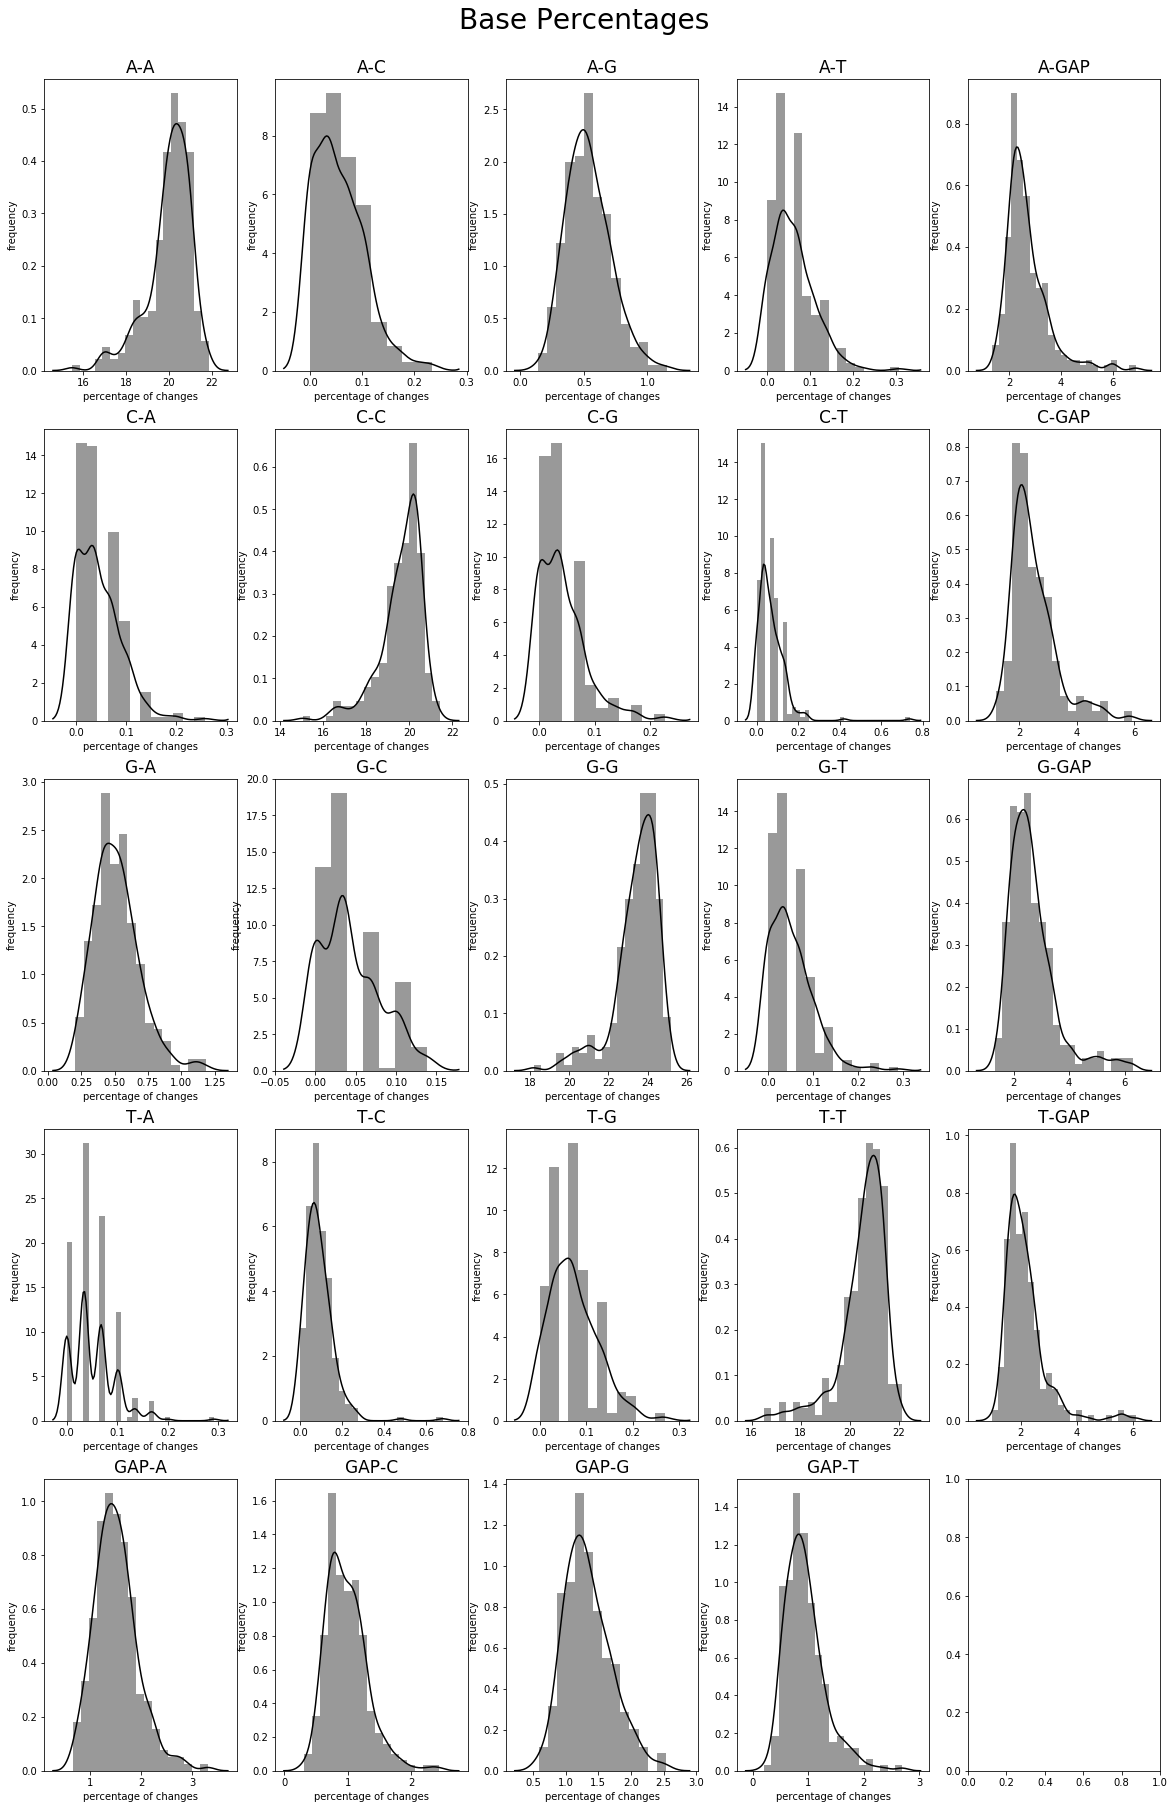

In [49]:
fg, ax = plt.subplots(5, 5, figsize=(20,20))
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
titles = ['A-A', 'A-C', 'A-G', 'A-T', 'A-GAP', 'C-A', 'C-C', 'C-G', 'C-T', 'C-GAP', 'G-A', 'G-C', 'G-G', 'G-T', 'G-GAP', 'T-A', 'T-C', 'T-G', 'T-T', 'T-GAP', 'GAP-A', 'GAP-C', 'GAP-G', 'GAP-T']

for i in range(0, 24):
        if i < 5:
            sns.distplot(astats[i], color='k', ax=ax[0][i])
            ax[0][i].set_title(titles[i], fontsize=17)
            ax[0][i].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 4 and i < 10:
            sns.distplot(cstats[i-5], color='k', ax=ax[1][i-5])
            ax[1][i-5].set_title(titles[i], fontsize=17)
            ax[1][i-5].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 9 and i < 15:
            sns.distplot(gstats[i-10], color='k', ax=ax[2][i-10])
            ax[2][i-10].set_title(titles[i], fontsize=17)
            ax[2][i-10].set(xlabel='percentage of changes', ylabel='frequency')
        elif i > 14 and i < 20:
            sns.distplot(tstats[i-15], color='k', ax=ax[3][i-15])
            ax[3][i-15].set_title(titles[i], fontsize=17)
            ax[3][i-15].set(xlabel='percentage of changes', ylabel='frequency')
        else:
            sns.distplot(gapstats[i-20], color='k', ax=ax[4][i-20])
            ax[4][i-20].set_title(titles[i], fontsize=17)
            ax[4][i-20].set(xlabel='percentage of changes', ylabel='frequency')


### Draw expected values - #A/total
### Plot above and below 2000 to show why you filter?

#### Mutations from X to purines appear to be the most common type of mutation

In [50]:
ostatstats = [[np.mean(ostats[0]),np.mean(ostats[1]),np.mean(ostats[2]),np.mean(ostats[3]),np.mean(ostats[4])],[np.median(ostats[0]),np.median(ostats[1]),np.median(ostats[2]),np.median(ostats[3]),np.median(ostats[4])]]
ostatsframe = pd.DataFrame(data=ostatstats, columns=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches'], index=['Mean', 'Median'])
ostatsframe

,Overall Matches,A Matches,C Matches,G Matches,T Matches
Mean,83.617828,20.017442,19.611139,23.442637,20.546609
Median,84.682861,20.232797,19.850949,23.697479,20.761128


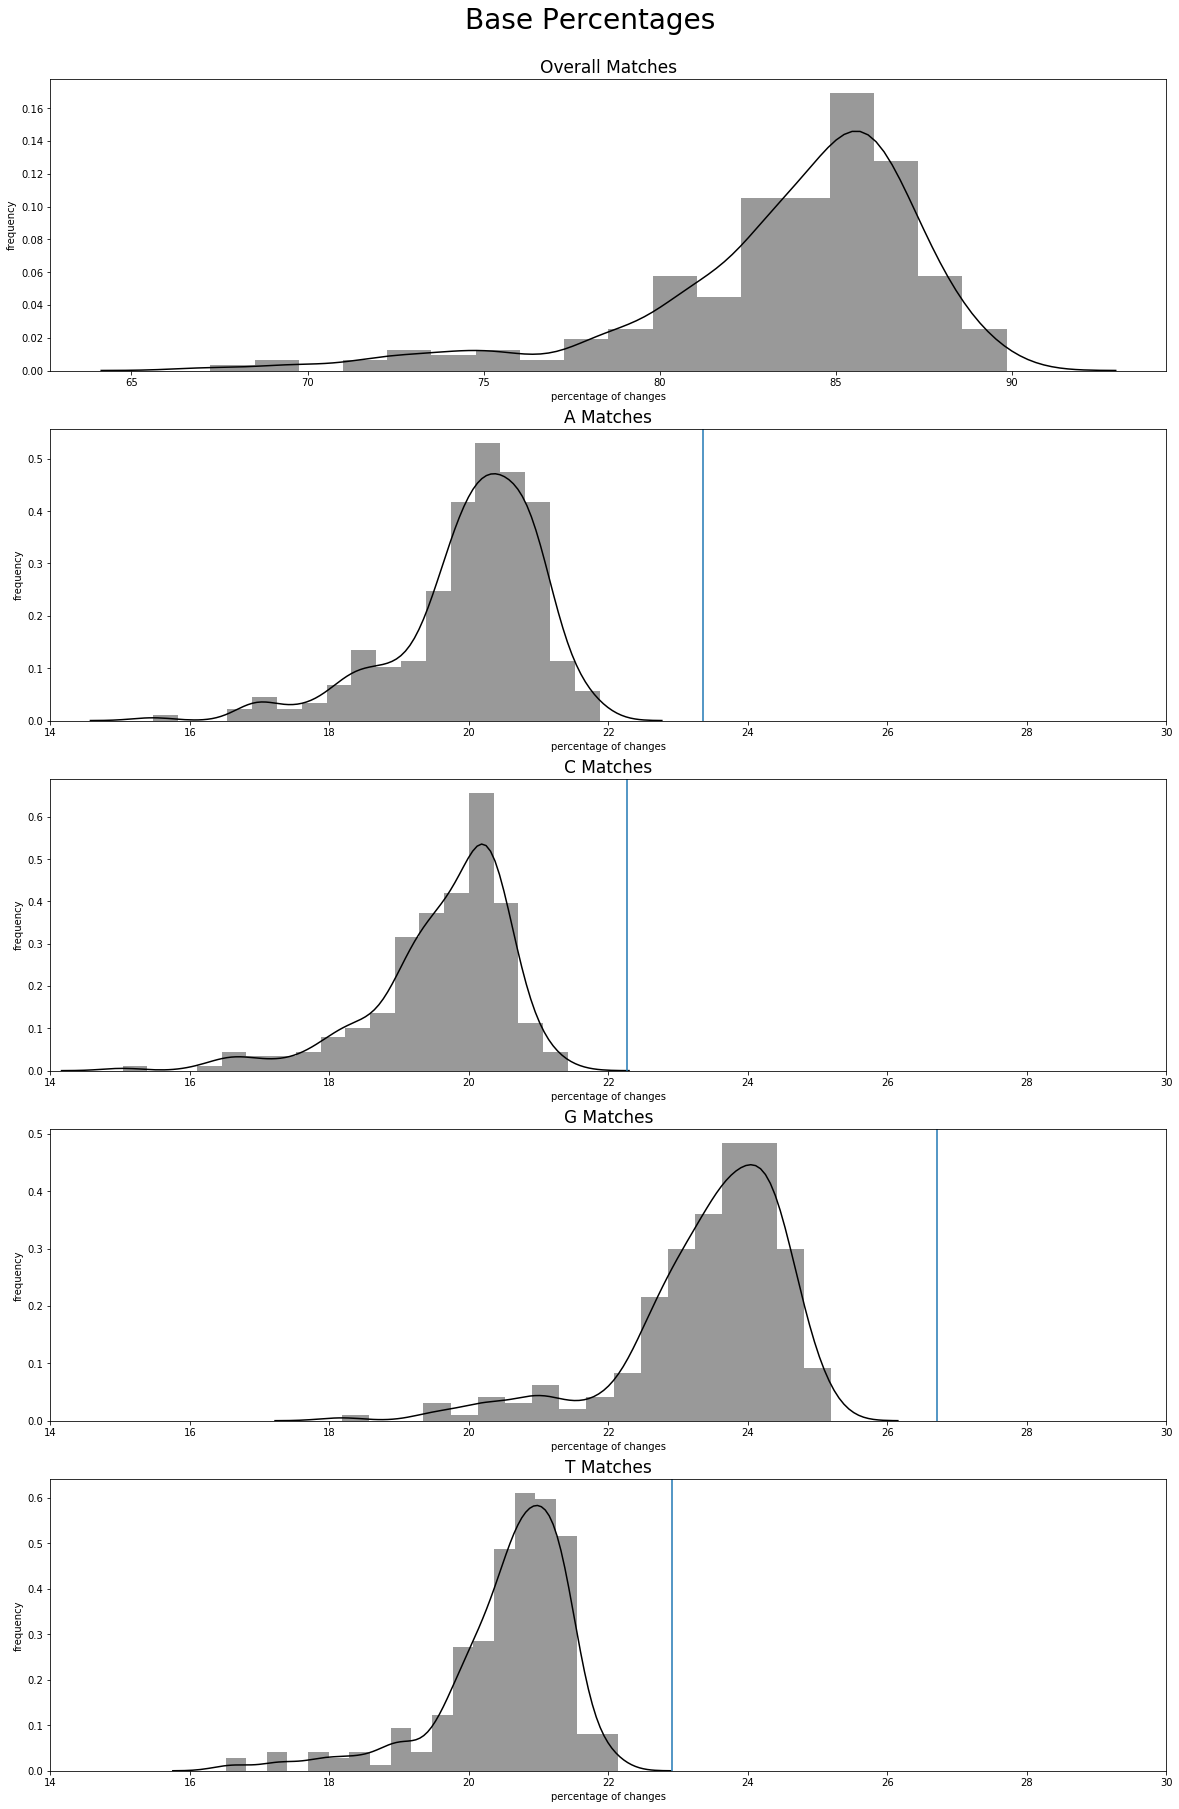

In [51]:
fg, ax = plt.subplots(5, 1, figsize=(20,20), squeeze=False)
fg.suptitle("Base Percentages", fontsize=28, y=1.35)
fg.subplots_adjust(top=1.3)
otitles=['Overall Matches', 'A Matches', 'C Matches', 'G Matches', 'T Matches']

for i in range(0, len(ostats)):
    sns.distplot(ostats[i], color='k', ax=ax[i][0])
    ax[i][0].set_title(otitles[i], fontsize=17)
    ax[i][0].set(xlabel='percentage of changes', ylabel='frequency')
    if i > 0:
        ax[i][0].set(xlim=(14, 30))
        ax[i][0].axvline(np.mean(expec[i-1]))

Look at whether homopolymers are represented differently in the sequenced file - shortened (resulting in gaps)
    - loop over length of alignment, use counter to locate homopolymers, 
        pull out region using index and look for number of gaps?

In [217]:
counter = 0
tick = 0
region = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
alignments = pairwise2.align.globalms(gdict_seqs[0], dict5['558bfd00-efe5-4acd-8e71-0fc44c8e52de'].seq, 1, -1, -1, 0)
for i in range(0, len(alignments[0][0])):
    if i > 0 and alignments[0][0][i] == alignments[0][0][i-1] and alignments[0][0][i] != '-':
        counter += 1
        if counter >= 3:
            region.loc[tick] = [alignments[0][0][i-counter:i+1], counter + 1, i - counter, i + 1]
            tick += 1
    else:
        counter = 0

In [171]:
genregion = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
indexes = 0
for i in range(0, len(region)):
    if i < len(region)-1:
        if region.loc[i, 'Sequence Length'] >= region.loc[i+1, 'Sequence Length']:
            genregion.loc[indexes] = region.loc[i]
            indexes += 1
    else:
        genregion.loc[indexes] = region.loc[i]

In [185]:
seqregion = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
counters = []
for i in range(0, len(genregion)):
    seqregion.loc[i] = [alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']], len(alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']]), genregion.loc[i, 'Sequence Start'], genregion.loc[i, 'Sequence End']]
    tmp = 0
    for j in alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']]:
        if j == '-':
            tmp += 1
    counters.append(tmp)
seqregion.loc[:,'Number of Gaps'] = counters

In [186]:
seqregion

,Sequence,Sequence Length,Sequence Start,Sequence End,Number of Gaps
0,-AAAA,5,49,54,1
1,GGGG,4,131,135,0
2,GGGG,4,162,166,0
3,-TTT,4,175,179,1
4,-AAAAA,6,185,191,1
5,TTTT,4,269,273,0
6,GGGGG,5,315,320,0
7,TTTT,4,406,410,0
8,GGGG,4,433,437,0
9,-TTTT,5,510,515,1


In [210]:
homopols = pd.DataFrame(columns=['Mean Proportion of Gaps (#Gaps/#Bases)', 'Mean Homopolymer Length', 'Mean Number of Gaps per Homopolymer', 'Median Number of Gaps per Homopolymer'])
for key in dict5:
    if len(dict5[key].seq) > 2000:
        counter = 0
        tick = 0
        region = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
        alignments = pairwise2.align.globalms(gdict_seqs[0], dict5[key].seq, 1, -1, -1, 0)
        for i in range(0, len(alignments[0][0])):
            if i > 0 and alignments[0][0][i] == alignments[0][0][i-1] and alignments[0][0][i] != '-':
                counter += 1
                if counter >= 3:
                    region.loc[tick] = [alignments[0][0][i-counter:i+1], counter + 1, i - counter, i + 1]
                    tick += 1
            else:
                counter = 0
        genregion = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
        indexes = 0
        for i in range(0, len(region)):
            if i < len(region)-1:
                if region.loc[i, 'Sequence Length'] >= region.loc[i+1, 'Sequence Length']:
                    genregion.loc[indexes] = region.loc[i]
                    indexes += 1
            else:
                genregion.loc[indexes] = region.loc[i]
        seqregion = pd.DataFrame(columns=['Sequence', 'Sequence Length', 'Sequence Start', 'Sequence End'])
        counters = []
        for i in range(0, len(genregion)):
            seqregion.loc[i] = [alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']], len(alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']]), genregion.loc[i, 'Sequence Start'], genregion.loc[i, 'Sequence End']]
            tmp = 0
            for j in alignments[0][1][genregion.loc[i, 'Sequence Start']:genregion.loc[i, 'Sequence End']]:
                if j == '-':
                    tmp += 1
            counters.append(tmp)
        seqregion.loc[:,'Number of Gaps'] = counters
        homopols.loc[key] = [np.sum(counters)/np.sum(seqregion['Sequence Length']), np.mean(seqregion['Sequence Length']), (np.sum(counters)/np.sum(seqregion['Sequence Length']))*(np.mean(seqregion['Sequence Length'])), (np.sum(counters)/np.sum(seqregion['Sequence Length']))*(np.median(seqregion['Sequence Length']))]

In [218]:
homopols

,Mean Proportion of Gaps (#Gaps/#Bases),Mean Homopolymer Length,Mean Number of Gaps per Homopolymer,Median Number of Gaps per Homopolymer
558bfd00-efe5-4acd-8e71-0fc44c8e52de,0.136364,4.512821,0.615385,0.545455
9fb1bbfa-657e-42d9-837f-45efac0544b2,0.269006,4.500000,1.210526,1.076023
bc4df11e-2ae1-42fd-b573-95bdebb48c2d,0.203488,4.526316,0.921053,0.813953
7c6ba51f-0da1-4d40-a20a-5edf1a7a01cf,0.198795,4.611111,0.916667,0.795181
03895bbd-2bf9-4cf1-b073-4bcd7ad8ad09,0.167630,4.435897,0.743590,0.670520
d8980c2f-9810-4716-b493-e6c1571a769b,0.164773,4.512821,0.743590,0.659091
efd77ed1-10d6-4460-8c39-ab92db504ed2,0.298780,4.555556,1.361111,1.195122
05a465c9-ba1d-4e1b-b2e5-bb1b7920ef4a,0.198830,4.621622,0.918919,0.795322
3d23b0f9-6156-415d-8960-2b43eb229651,0.205714,4.605263,0.947368,0.822857
78d0ccf7-6594-4c01-ad10-00b491932570,0.208333,4.540541,0.945946,0.833333


In [215]:
print(np.mean(homopols['Mean Number of Gaps per Homopolymer']))
print(np.median(homopols['Mean Number of Gaps per Homopolymer']))
print(np.mean(homopols['Median Number of Gaps per Homopolymer']))
print(np.median(homopols['Median Number of Gaps per Homopolymer']))

0.8470031434943914
0.8285714285714286
0.7464496624492413
0.7272727272727273


In [ ]:
frame5 = 